# Naive Bayes[NB] with TF-IDF
# TF=Term Frequency 
# IDF=Inverse Document Frequency

Naive Bayes is a Machine Learning method you can use to predict likehood that can event will occur given evidence that's 
present in data

1.Navie Bayes Classification base on Bayes Theorem.

2.Bayes Theorem is based on conditional probability.The conditional probability help us to calculate probability that something will happen,given that something else has already happend. 

In [2]:
# Navie Bayes algo use apply when conditional probability found & data into text form.

In [3]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

# Load data

In [4]:
df=pd.read_table('Restaurant_Reviews.tsv')

In [5]:
df

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1
...,...,...
995,I think food should have flavor and texture an...,0
996,Appetite instantly gone.,0
997,Overall I was not impressed and would not go b...,0
998,"The whole experience was underwhelming, and I ...",0


In [6]:
df.shape

(1000, 2)

In [7]:
df.isnull().sum()

Review    0
Liked     0
dtype: int64

# Split Input and output

In [8]:
x=df['Review']
y=df['Liked']

In [9]:
x

0                               Wow... Loved this place.
1                                     Crust is not good.
2              Not tasty and the texture was just nasty.
3      Stopped by during the late May bank holiday of...
4      The selection on the menu was great and so wer...
                             ...                        
995    I think food should have flavor and texture an...
996                             Appetite instantly gone.
997    Overall I was not impressed and would not go b...
998    The whole experience was underwhelming, and I ...
999    Then, as if I hadn't wasted enough of my life ...
Name: Review, Length: 1000, dtype: object

In [10]:
y

0      1
1      0
2      0
3      1
4      1
      ..
995    0
996    0
997    0
998    0
999    0
Name: Liked, Length: 1000, dtype: int64

# Split data train & test

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.20,random_state=0)

In [12]:
len(x_train)

800

In [13]:
len(x_test)

200

# Choose Algo & Set Hyperparameters

In [14]:
# Convert Text into Number with TfidfVactorizer
# TfidfVactorizer() Library use to convert text into numaric float form.
# TfidfVactorizer() it word count & also obtain important word score.

In [15]:
cv=TfidfVectorizer()

# Train Model

In [16]:
# toarray use for convert data into array
cv_train=cv.fit_transform(x_train).toarray()
cv_test=cv.transform(x_test).toarray()

In [17]:
cv_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [18]:
cv_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [19]:
nb=MultinomialNB()
nb.fit(cv_train,y_train)

MultinomialNB()

In [20]:
y_pred=nb.predict(cv_test)

In [21]:
y_pred

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1], dtype=int64)

# Find out Accuracy

In [22]:
accuracy_score(y_test,y_test)

1.0

In [23]:
print('wrong prediction out of total:')
print((y_test!=y_pred).sum(),'/',(y_test==y_pred).sum()+(y_test!=y_pred).sum())

wrong prediction out of total:
42 / 200


# How to find out missclafication samples

In [24]:
import numpy as np
np.where(y_pred!=y_test)

(array([  5,  21,  24,  26,  33,  37,  41,  48,  49,  60,  62,  63,  64,
         65,  67,  73,  76,  86,  89,  96,  97,  99, 100, 103, 104, 105,
        109, 110, 113, 126, 127, 129, 140, 147, 149, 151, 157, 159, 166,
        169, 175, 179], dtype=int64),)

# Confusion Matrix

In [25]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[77, 20],
       [22, 81]], dtype=int64)

# plotting confusion matrix

In [26]:
import seaborn as sb
import matplotlib.pyplot as plt

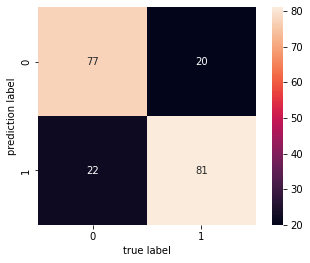

In [27]:
sb.heatmap(cm,annot=True,cbar=True,square=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('prediction label')
plt.show()

In [28]:
print(nb.score(cv_train,y_train))
print(nb.score(cv_test,y_test))

0.96625
0.79


# From CountVectorizer()

In [29]:
cv=CountVectorizer()

In [30]:
cv_train=cv.fit_transform(x_train).toarray()
cv_test=cv.transform(x_test).toarray()

In [31]:
cv_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [32]:
cv_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [33]:
nb=MultinomialNB()
nb.fit(cv_train,y_train)

MultinomialNB()

In [34]:
y_pred=nb.predict(cv_test)

In [35]:
y_pred

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [36]:
accuracy_score(y_test,y_test)

1.0

In [37]:
print('wrong prediction out of total:')
print((y_test!=y_pred).sum(),'/',((y_test==y_pred).sum()))

wrong prediction out of total:
38 / 162


In [38]:
import numpy as np
np.where(y_pred!=y_test)

(array([ 21,  24,  26,  33,  37,  41,  42,  48,  49,  60,  62,  63,  64,
         67,  73,  76,  86,  89,  96,  97, 100, 103, 104, 105, 109, 110,
        113, 129, 140, 147, 149, 151, 159, 166, 169, 175, 179, 194],
       dtype=int64),)

In [39]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[81, 16],
       [22, 81]], dtype=int64)

In [40]:
import seaborn as sb
import matplotlib.pyplot as plt

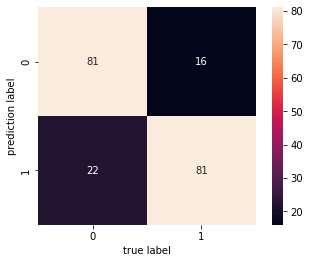

In [41]:
sb.heatmap(cm,annot=True,cbar=True,square=True,fmt='d')
plt.xlabel('true label')
plt.ylabel('prediction label')
plt.show()

In [42]:
print(nb.score(cv_train,y_train))
print(nb.score(cv_test,y_test))

0.95875
0.81
